In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import funcs
from statsmodels.formula.api import ols
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [3]:
md = pd.read_csv('Masters_StatsT25.csv')

In [4]:
md.rename(columns ={'Driving_Rank':'S1',"Top_10's":'S2','Percent_BreakPar_Ranklog':'S3','Avg_Score_Ranklog':'S4','Money_Ranklog':'S5','Average_Drive_Distance':'S6','Percent_Fairway_Hit':'S7','Percent_Greens_Hit':'S8','Percent_Par3_Bird':'S9','Percent_Par4_Bird':'S10','Percent_Par5_Bird':'S11','Avg_scoreB4cut':'S12'}, inplace = True)

In [380]:
# X = md[['S2','S3', 'S5','S8','S9','S10','S11','S12']]
y = md['Masters_Top_25']

In [381]:
X = md[['S2','S3','S9','S11','S12']]


In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Pipeline

In [383]:
pipe_lr = Pipeline([
            ('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([
            ('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([
            ('pca', PCA(n_components=2)),
            ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([
            ('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([
            ('pca', PCA(n_components=2)),
            ('clf', svm.SVC(random_state=42))])

### Params

In [394]:
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]


grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear', 'saga']}] 


penalty = ['l1', 'l2']
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

In [395]:
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 

gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=jobs)

In [396]:
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

In [397]:
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
        2: 'Random Forest', 3: 'Random Forest w/PCA', 
        4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}


In [398]:
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    
    print('Best params: %s' % gs.best_params_)
    
    print('Best training accuracy: %.3f' % gs.best_score_)
    
    y_pred = gs.predict(X_test)
    f1 = 2*(metrics.precision_score(y_test, y_pred_class)*metrics.recall_score(y_test, y_pred_class))/(metrics.precision_score(y_test, y_pred_class)+metrics.recall_score(y_test, y_pred_class))
    
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    print('Test set F1 Score: %s' % f1)
    
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best training accuracy: 0.646
Test set accuracy score for best params: 0.694 
Test set F1 Score: 0.3188405797101449

Estimator: Logistic Regression w/PCA
Best params: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.642
Test set accuracy score for best params: 0.686 
Test set F1 Score: 0.3188405797101449

Estimator: Random Forest


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}
Best training accuracy: 0.651
Test set accuracy score for best params: 0.680 
Test set F1 Score: 0.3188405797101449

Estimator: Random Forest w/PCA


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 7, 'clf__min_samples_split': 2}
Best training accuracy: 0.635
Test set accuracy score for best params: 0.667 
Test set F1 Score: 0.3188405797101449

Estimator: Support Vector Machine


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training accuracy: 0.639
Test set accuracy score for best params: 0.684 
Test set F1 Score: 0.3188405797101449

Estimator: Support Vector Machine w/PCA
Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training accuracy: 0.641
Test set accuracy score for best params: 0.675 
Test set F1 Score: 0.3188405797101449

Classifier with best test set accuracy: Logistic Regression


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [244]:
model = SVC(kernel = 'rbf' , C = 1).fit(X_train, y_train)
y_pred_class = model.predict(X_test)
print(confusion_matrix(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

[[370  13]
 [163  33]]
              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81       383
         1.0       0.72      0.17      0.27       196

    accuracy                           0.70       579
   macro avg       0.71      0.57      0.54       579
weighted avg       0.70      0.70      0.63       579

0.696027633851468


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [338]:
model = RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 7, min_samples_split = 2).fit(X_train, y_train)
y_pred_class = model.predict(X_test)
print(confusion_matrix(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(metrics.accuracy_score(y_test, y_pred_class))

[[347  36]
 [152  44]]
              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       383
         1.0       0.55      0.22      0.32       196

    accuracy                           0.68       579
   macro avg       0.62      0.57      0.55       579
weighted avg       0.65      0.68      0.63       579

0.6753022452504318


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [339]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='purple') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

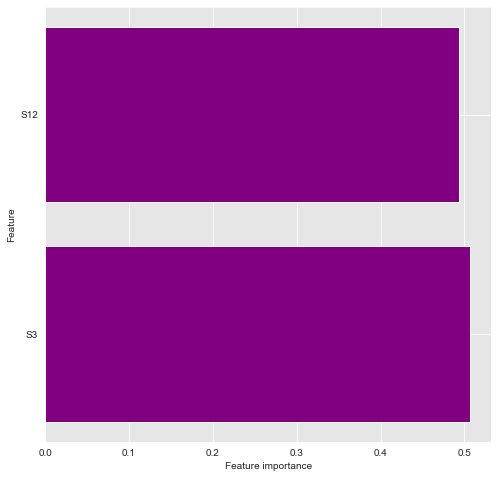

In [340]:
plot_feature_importances(model)

# Run More Set Models Through Pipeline

In [295]:
classifiers = [
    KNeighborsClassifier(100),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')
model score: 0.684


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score: 0.661


/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=True, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
model score: 0.618
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
model score: 0.556
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   

/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/findlaybowditch/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model score: 0.661


md.head9)

# Logistic Regression

# Classification Evaluation

In [5]:
X = md[['S2','S3', 'S5','S8','S9','S10','S11','S12']]
y = md['Masters_Top_25']

In [175]:
# Create a list of the features being used in the 
feature_cols = X.columns

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [252]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [254]:
dictionary

{'S2': 0.14308791419879183,
 'S3': -0.2958081748861753,
 'S5': -0.06607285673657479,
 'S8': 0.09983691559691273,
 'S9': -0.10708635753159344,
 'S10': -0.10624614118262504,
 'S11': -0.1260598828545488,
 'S12': -0.215284825273551}

In [255]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

**Classification accuracy:** percentage of correct predictions

In [256]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7046632124352331


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [257]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0.0    383
1.0    196
Name: Masters_Top_25, dtype: int64

In [258]:
# calculate the percentage of ones
y_test.mean()

0.3385146804835924

In [259]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6614853195164077

In [260]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6614853195164077

In [261]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0.]
Pred: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0.]


In [262]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[353  30]
 [141  55]]


In [263]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['NotTop25', 'Top25']

In [302]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

Confusion Matrix, without normalization
[[353  30]
 [141  55]]


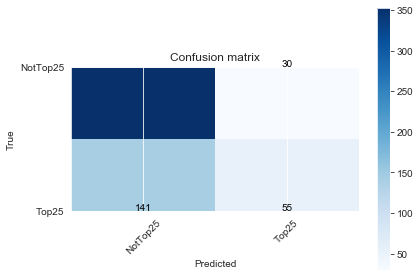

In [303]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [267]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [268]:
print((TP + TN) / float(TP + TN + FP + FN))

0.7046632124352331


In [269]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.7046632124352331


##### Out of the players that I predicted to be in top25 64% were

In [270]:
metrics.precision_score(y_test, y_pred_class)

0.6470588235294118

#### Out of the players that were in the top 25 I predicted 27% of them

In [271]:
metrics.recall_score(y_test, y_pred_class)

0.28061224489795916

**Specificity:** 


In [272]:
(TN / float(TN + FP))

0.9216710182767625

**False Positive Rate:**

###### Predict That a player IS in the top25 and they were NOT

In [273]:
(FP / float(TN + FP))

0.0783289817232376

##### Predicted that they would NOT be in the top25 and they WERE

In [274]:
(FN / float(FN + TP))

0.7193877551020408

## F1 Score

In [275]:
#calculating the F1 score
2*(metrics.precision_score(y_test, y_pred_class)*metrics.recall_score(y_test, y_pred_class))/(metrics.precision_score(y_test, y_pred_class)+metrics.recall_score(y_test, y_pred_class))

0.39145907473309605

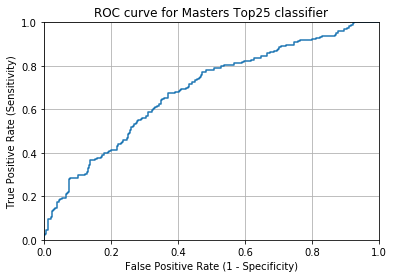

In [288]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Masters Top25 classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [289]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [290]:
evaluate_threshold(0.5)

Sensitivity: 0.28061224489795916
Specificity: 0.9216710182767625


In [291]:
evaluate_threshold(0.3)

Sensitivity: 0.826530612244898
Specificity: 0.381201044386423


In [292]:
# calculate cross-validated AUC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.6437873231484375

In [293]:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC: 0.6872036020674589


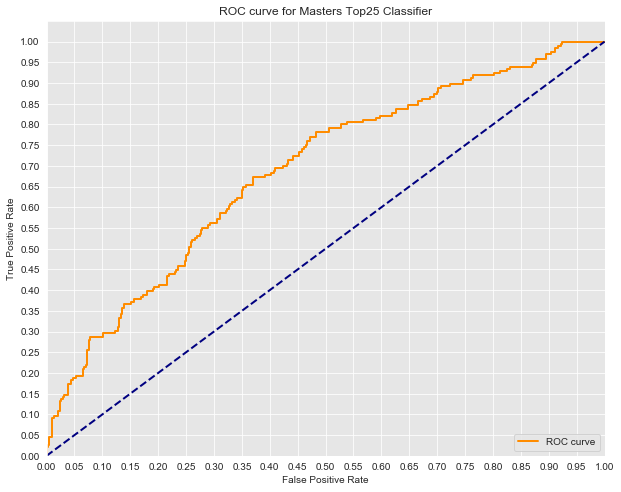

In [294]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Masters Top25 Classifier')
plt.legend(loc='lower right')
plt.show()